In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go

In [4]:
families = ['noise', 'truncated_urn', 'euclidean', 'resampling']
algos = ['basin_hopping_step', 'basin_hopping', 'greedy_dp', 'pairs']
num_trials = 10

res_dir = os.path.join('results', 'heuristic_to_change_next_reference_metric', '30x60')

reports = []

for family in families:
    for algo in algos:
        directory = os.path.join(res_dir, family, algo)
        try:
            report = pd.read_csv(os.path.join(directory, 'report.csv'))
            report['family'] = family  
            report['algo'] = algo
            reports.append(report)
        except:
            print('No report.csv in', directory)
        

No report.csv in results/heuristic_to_change_next_reference_metric/30x60/noise/basin_hopping
No report.csv in results/heuristic_to_change_next_reference_metric/30x60/truncated_urn/basin_hopping


In [5]:
report = pd.concat(reports)

In [56]:
df

,i_generated,distance,reference_distance,i_heuristic,i_trial,dt,algorithm,family,algo
1,0,265,392,0,0,3.863435,heuristic,noise,basin_hopping_step
2,0,265,392,0,1,4.624301,heuristic,noise,basin_hopping_step
3,0,265,392,0,2,4.689702,heuristic,noise,basin_hopping_step
4,0,262,392,0,3,4.711662,heuristic,noise,basin_hopping_step
5,0,265,392,0,4,3.844958,heuristic,noise,basin_hopping_step
...,...,...,...,...,...,...,...,...,...
1583,7,106,324,115,9,93.764555,heuristic,resampling,pairs
1584,7,81,324,116,9,96.561834,heuristic,resampling,pairs
1585,7,55,324,117,9,101.178422,heuristic,resampling,pairs
1586,7,55,324,118,9,95.819654,heuristic,resampling,pairs


No data for noise basin_hopping
No data for truncated_urn basin_hopping


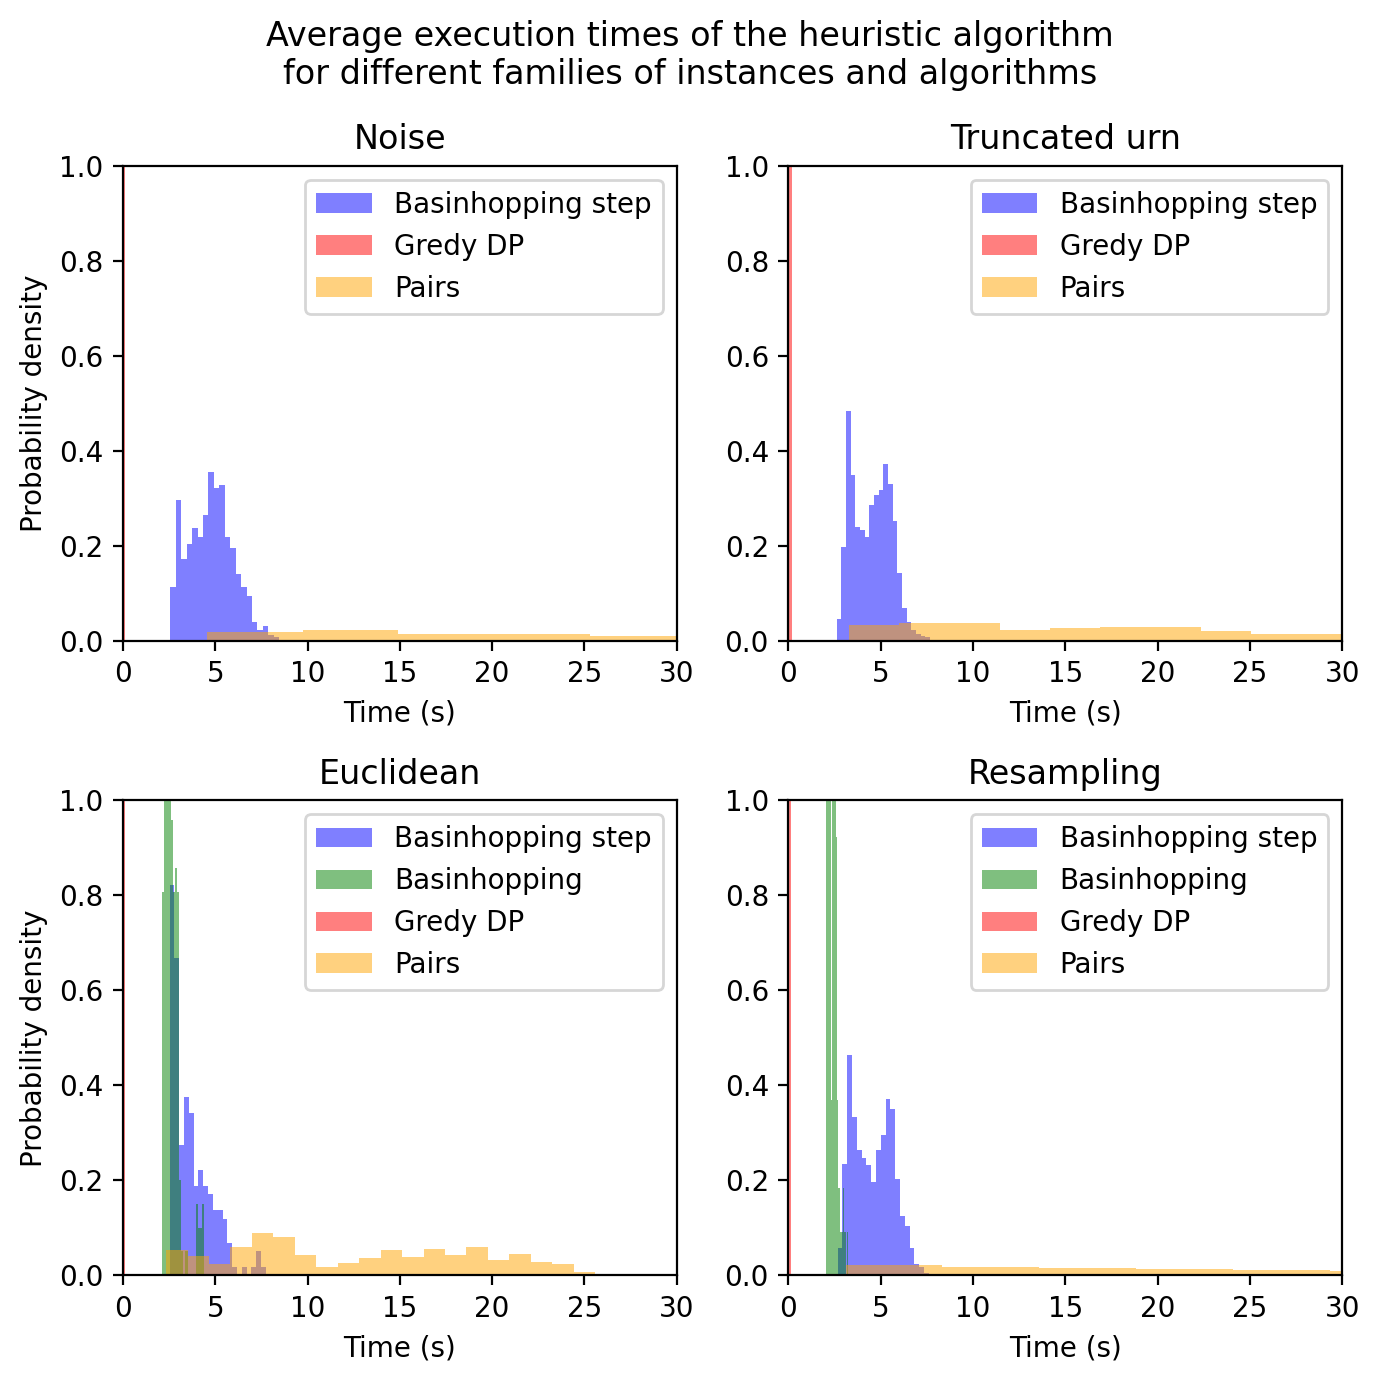

In [85]:
family_name = {
    'noise': 'Noise',
    'truncated_urn': 'Truncated urn',
    'euclidean': 'Euclidean',
    'resampling': 'Resampling',
}

algo_color = {
    'basin_hopping': 'green',
    'basin_hopping_step': 'blue',
    'pairs': 'orange',
    'greedy_dp': 'red',
}

algo_name = {'basin_hopping': 'Basinhopping', 'basin_hopping_step': 'Basinhopping step', 
                 'greedy_dp': 'Gredy DP', 'pairs': 'Pairs'}


df = report[report['algorithm'] == 'heuristic']
fig, axs= plt.subplots(2, 2, figsize=(7, 7), dpi=200)
for i, (family, ax) in enumerate(zip(families, axs.flatten())):
    if i == 0 or i == 2:
        ax.set_ylabel('Probability density')
    ax.set_xlabel('Time (s)')
    ax.set_title(family_name[family])
    
    for algo in algos:
        df_ = df[(df['family'] == family) & (df['algo'] == algo)]
        if len(df_) == 0:
            print(f'No data for {family} {algo}')
            continue
        ax.hist(df_['dt'], bins=20, density=True, alpha=0.5, label=f'{algo_name[algo]}', color=algo_color[algo])

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 1)
    ax.legend()
    
fig.suptitle('Average execution times of the heuristic algorithm\nfor different families of instances and algorithms')
fig.tight_layout()
plt.show()

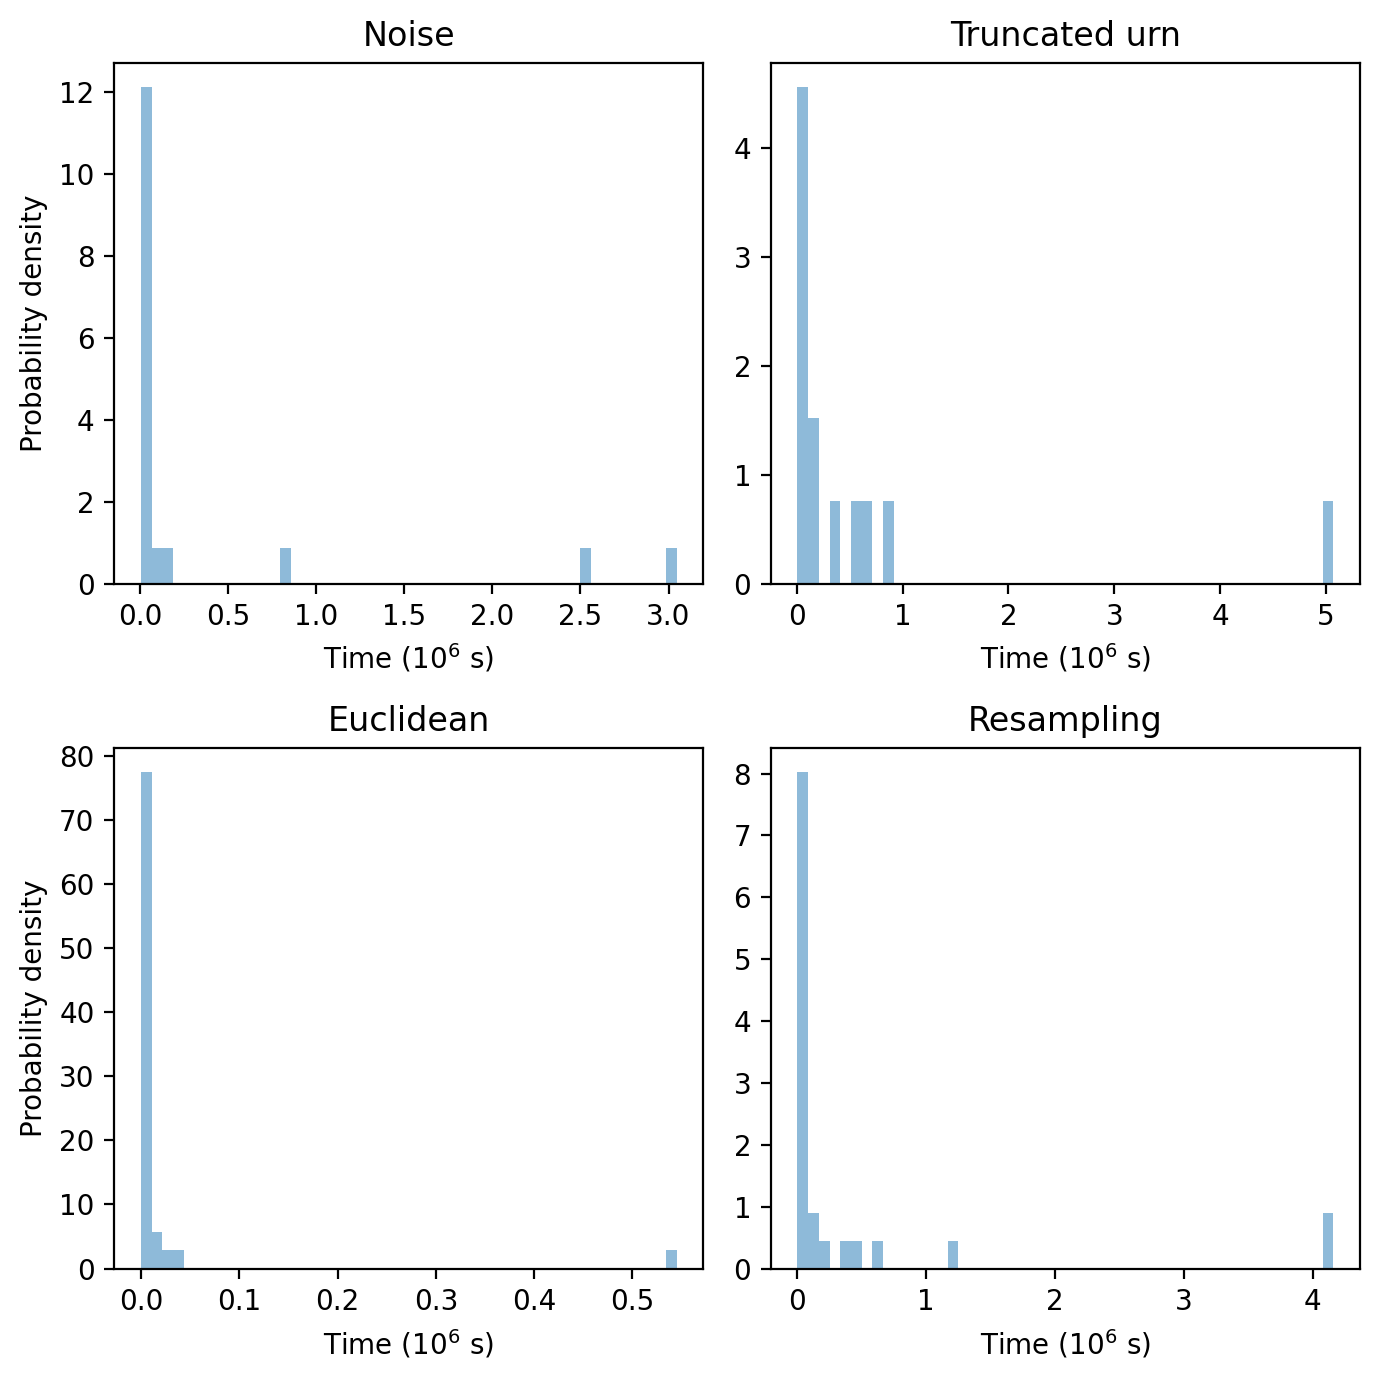

In [38]:

df = report[report['algorithm'] == 'reference']
fig, axs= plt.subplots(2, 2, figsize=(7, 7), dpi=200)
for i, (family, ax) in enumerate(zip(families, axs.flatten())):
    df_ = df[(df['family'] == family)]
    ax.hist(df_['dt'] / 1e6, bins=50, density=True, alpha=0.5, label=f'{family} {algo}')

    ax.set_title(family_name[family])
    
    if i == 0 or i == 2:
        ax.set_ylabel('Probability density')
    ax.set_xlabel('Time ($10^6$ s)')

fig.tight_layout()
plt.show()

In [39]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated', 'i_trial']).count()
steps_df = df.loc[:, :, 'heuristic', :]
steps_df = steps_df.rename(columns={'dt': 'steps'})
steps_df = steps_df['steps']

In [40]:
steps_df

family         algo           i_generated  i_trial
euclidean      basin_hopping  0            0           1
                                           1           1
                                           2           1
                                           3           1
                                           4           1
                                                      ..
truncated_urn  pairs          3            4          48
                                           5          48
                                           6          48
                                           7          48
                                           8          28
Name: steps, Length: 896, dtype: int64

In [41]:
df = steps_df.groupby(level=[0, 1, 2]).agg([np.mean, np.std])
df

mean       std
family        algo          i_generated                     
euclidean     basin_hopping 0             1.000000  0.000000
                            1             1.000000  0.000000
                            2             1.000000  0.000000
                            3             1.000000  0.000000
                            4             1.100000  0.316228
...                                            ...       ...
truncated_urn greedy_dp     3            13.900000  3.478505
              pairs         0            27.000000  0.000000
                            1             2.000000  0.000000
                            2            25.000000  0.000000
                            3            45.777778  6.666667

[91 rows x 2 columns]

In [48]:
# fig, ax = plt.subplots(dpi=300, figsize=(10, 5))

# for (family, algo), steps in df.groupby(level=(0, 1)):
#     xs = steps.index.get_level_values(-1)
#     ax.errorbar(xs, steps['mean'], steps['std'], label=f'{family} {algo}', fmt='--o')
    
# ax.set_xlabel('Number of generated references')
# ax.set_ylabel('Average trials to change reference')
# ax.set_title('Heuristic algorithm')
# ax.set_yscale('log')
# ax.legend()
# fig.tight_layout()



In [45]:
df = steps_df.groupby(level=[1, 2]).agg([np.mean, np.std])
# df

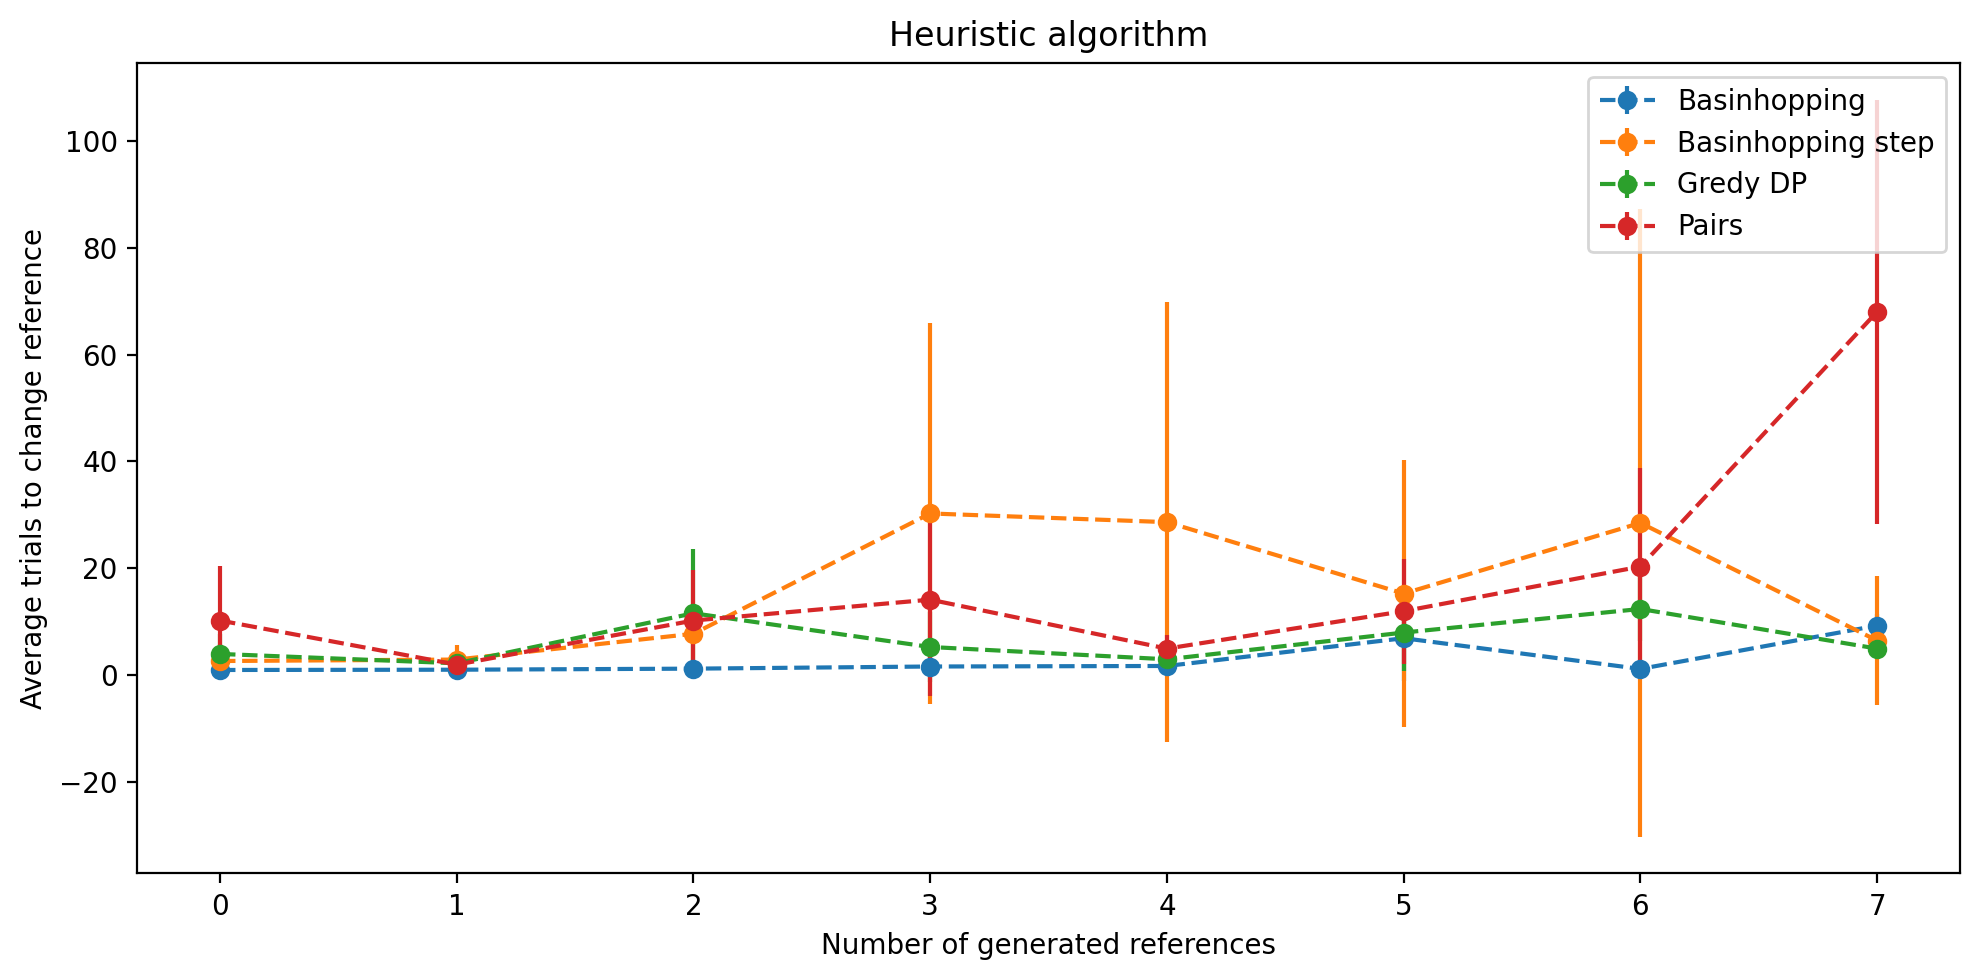

In [49]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

for algo, steps in df.groupby(level=0):
    xs = steps.index.get_level_values(-1)
    ax.errorbar(xs, steps['mean'], steps['std'], label=f'{algo_name[algo]}', fmt='--o')
    
ax.set_xlabel('Number of generated references')
ax.set_ylabel('Average trials to change reference')
ax.set_title('Heuristic algorithm')
# ax.set_yscale('log')
ax.legend()
fig.tight_layout()

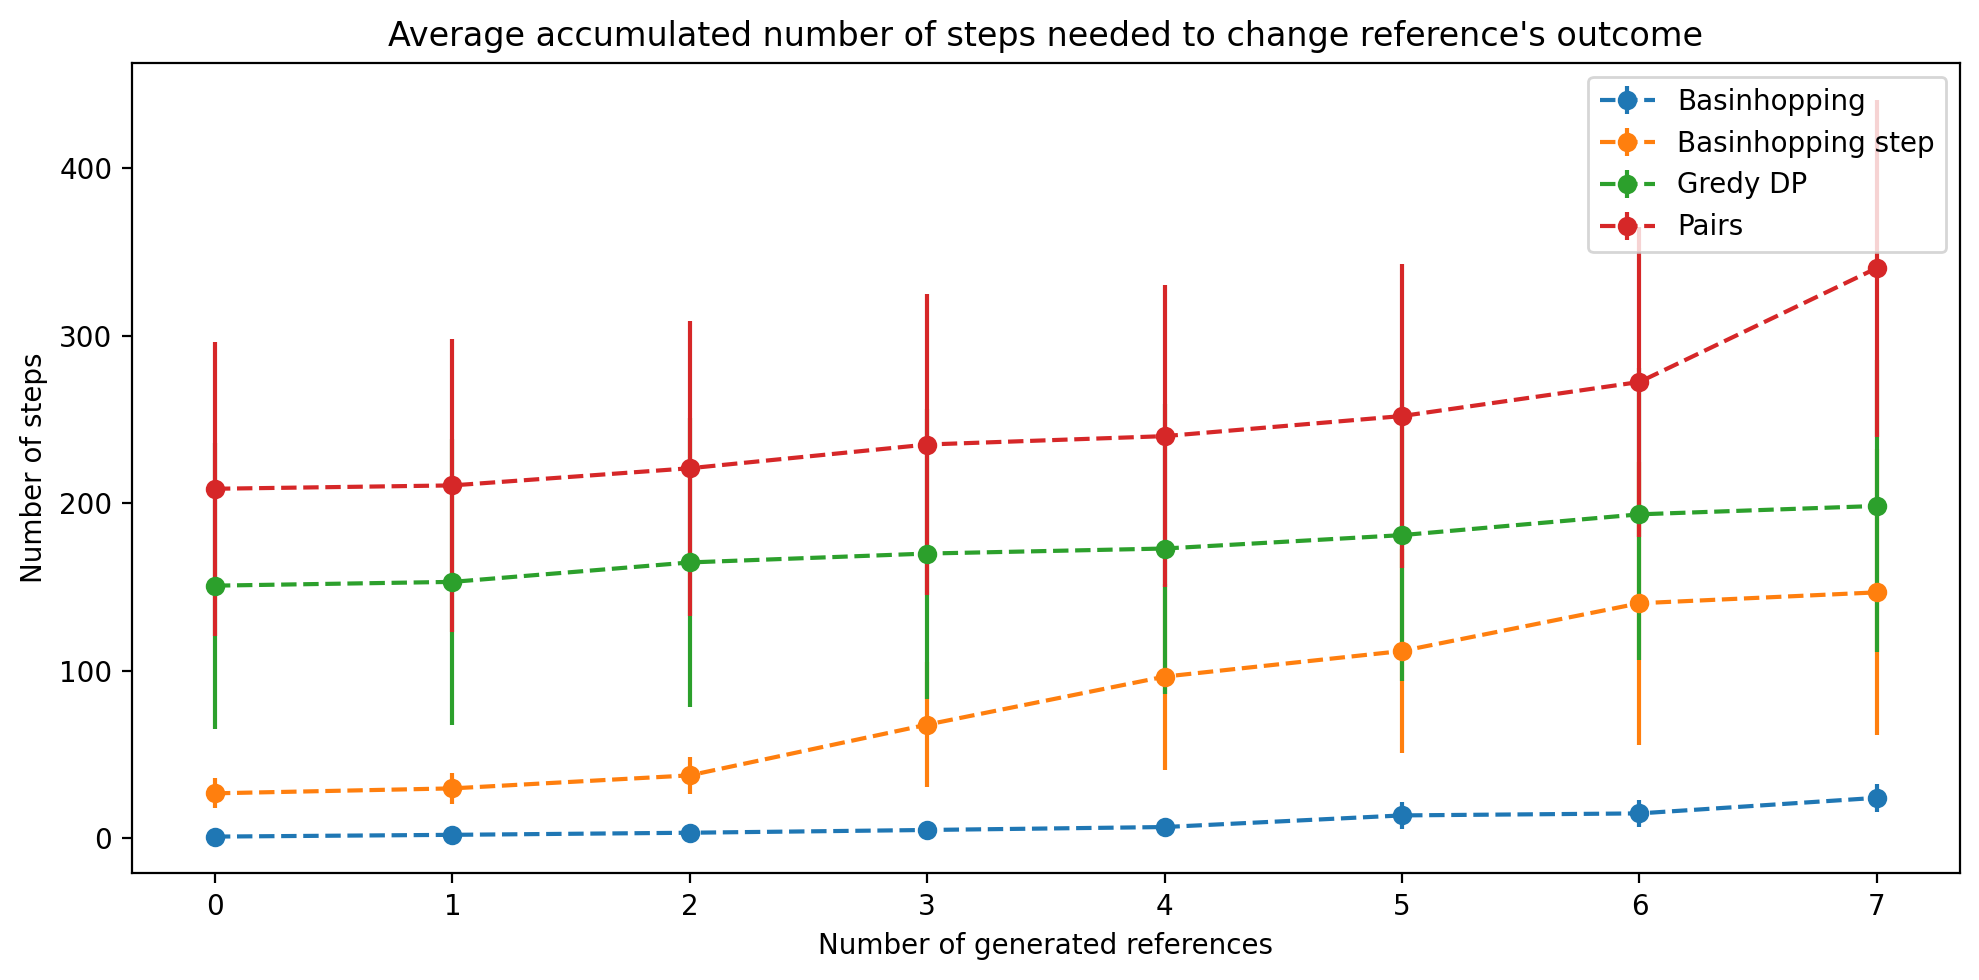

In [68]:
df = steps_df.groupby(level=[1, 2]).agg([np.mean, np.std])
df['std_squared'] = df['std'] ** 2
df = df.cumsum()
df['std'] = np.sqrt(df['std_squared'])
df = df.drop(columns='std_squared')



fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

for algo, steps in df.groupby(level=0):
    xs = steps.index.get_level_values(-1)
    ax.errorbar(xs, steps['mean'], steps['std'], label=f'{algo_name[algo]}', fmt='--o')
    
ax.set_xlabel('Number of generated references')
ax.set_title("Average accumulated number of steps needed to change reference's outcome")
ax.set_ylabel('Number of steps')
# ax.set_yscale('log')
ax.legend()
fig.tight_layout()

In [69]:


fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group',error_y="std",
             height=400)
fig.for_each_trace(lambda t: t.update(name=algo_name.get(t.name, t.name)))
fig.update_layout(xaxis_title='Number of generated references', title="Average steps needed to change reference's outcome",
                  yaxis_title='Number of steps', legend_title='Heuristic algorithm')

fig.show()


## Mean number of steps to change a reference point

In [73]:
df = steps_df.groupby(level=[1, 2]).agg([np.mean, np.std])

##################################

fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group',error_y="std",
             height=400)
fig.for_each_trace(lambda t: t.update(name=algo_name.get(t.name, t.name)))
fig.update_layout(xaxis_title='Number of generated references', title="Average steps per iterations needed to change reference's outcome",
                  yaxis_title="Steps", legend_title='Heuristic algorithm')

fig.show()

In [115]:

from plotly.offline import plot
from plotly.subplots import make_subplots

def create_subplots(subplots):
    if isinstance(subplots[0], list):
        rows = len(subplots)
        cols = len(subplots[0])
    else:
        rows = 1
        cols = len(subplots)
        subplots = [subplots]
    fig = make_subplots(rows=rows, cols=cols) 

    for row, subs in enumerate(subplots):
        for col, figure in enumerate(subs):
            for trace in range(len(figure["data"])):
                fig.add_trace(figure["data"][trace], row=row+1, col=col+1)
            fig.update_xaxes(title_text=figure["layout"]["xaxis"]["title"]["text"], row=row+1, col=col+1)
            fig.update_yaxes(title_text=figure["layout"]["yaxis"]["title"]["text"], row=row+1, col=col+1)
            fig.update_layout(title=figure["layout"]["title"]["text"], showlegend=True, legend_title_text=figure["layout"]["legend"]["title"]["text"])
    return fig

In [117]:
df = steps_df.groupby(level=[0, 1, 2]).agg([np.mean, np.std])
df['std_squared'] = df['std'] ** 2
df = df.cumsum()
df['std'] = np.sqrt(df['std_squared'])
df = df.drop(columns='std_squared')

figs = []

for family in families:
    dff = df.loc[family]
    fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group',error_y="std",
             height=400)
    fig.for_each_trace(lambda t: t.update(name=algo_name.get(t.name, t.name) + f' {family}'))
    fig.update_layout(xaxis_title='Number of generated references', title="Average steps per iterations needed to change reference's outcome",
                    yaxis_title="Steps", legend_title='Heuristic algorithm')
    figs.append(fig)

figs = [[figs[0], figs[1]], [figs[2], figs[3]]]
    

fig = create_subplots(figs)
fig.show()

# To reference

## Mean proportion to the reference

In [78]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated']).mean()
df = df.loc[:, :, 'heuristic', :]
df['proportion'] = df['distance'] / df['reference_distance']
df = df['proportion']
df = df.groupby(level=[1, 2]).agg([np.mean, np.std])

#############################################

fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group', error_y="std",
             height=400)

fig.for_each_trace(lambda t: t.update(name=algo_name.get(t.name, t.name)))

fig.update_layout(xaxis_title='Number of generated references', title="Average proportion to the reference's distances",
                  yaxis_title="Proportion", legend_title='Heuristic algorithm')
fig.show()

# Mean execution time

In [83]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated']).mean()
df = df.loc[:, :, 'heuristic', :]
df = df['dt']
df = df.groupby(level=[1, 2]).agg([np.mean, np.std])

####################################

fig = px.bar(df.reset_index(), x="i_generated", y="mean",
             color='algo', barmode='group',error_y="std",
             height=400)
fig.for_each_trace(lambda t: t.update(name=algo_name.get(t.name, t.name)))

fig.update_layout(xaxis_title='Number of generated references', legend_title='Heuristic algorithm', 
                  title="Average execution time of heuristics", yaxis_title="Time (s)")

fig.show()

In [22]:
report

,i_generated,distance,reference_distance,i_heuristic,i_trial,dt,algorithm,family,algo
0,0,392,392,-1,-1,10421.071099,reference,noise,basin_hopping_step
1,0,265,392,0,0,3.863435,heuristic,noise,basin_hopping_step
2,0,265,392,0,1,4.624301,heuristic,noise,basin_hopping_step
3,0,265,392,0,2,4.689702,heuristic,noise,basin_hopping_step
4,0,262,392,0,3,4.711662,heuristic,noise,basin_hopping_step
...,...,...,...,...,...,...,...,...,...
1583,7,106,324,115,9,93.764555,heuristic,resampling,pairs
1584,7,81,324,116,9,96.561834,heuristic,resampling,pairs
1585,7,55,324,117,9,101.178422,heuristic,resampling,pairs
1586,7,55,324,118,9,95.819654,heuristic,resampling,pairs


In [ ]:
df = report.groupby(['family', 'algo', 'algorithm', 'i_generated', 'i_trial']).max()
df = df.loc[:, :, 'heuristic', :]
df = df['dt']
df = df.groupby(level=[1, 2]).agg([np.mean, np.std])

df